In [1]:
%load_ext autoreload
%autoreload 2

from gprm.datasets import Rocks
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import pygmt
import seaborn as sns
import collections

import sys
sys.path.append('/Users/simon/OneDrive/Andes_works/python/')
import joyful_geochemistry as joy

import matplotlib as mpl
mpl.rc('font',family='Helvetica')
mpl.rcParams['axes.linewidth'] = 2
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['ytick.major.width'] = 2

model_dir = '../luffi/REM_surfaces_csv/'
gc_interpolator_dict = joy.make_gc_interpolator_dict(model_dir)


/opt/anaconda3/envs/pygmt7/lib/python3.8/site-packages/geopandas/_compat.py:123: UserWarning: The Shapely GEOS version (3.10.3-CAPI-1.16.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


In [25]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

la_yb_baseline_values = pd.DataFrame(data=np.arange(0,50,0.01))
gd_yb_baseline_values = pd.DataFrame(data=np.arange(1.5,4,0.005))
sr_y_baseline_values = pd.DataFrame(data=np.arange(0,80,0.05))

la_yb_baseline = joy.get_elevation(la_yb_baseline_values, 'la_yb')
la_yb_hu_baseline = joy.get_elevation(la_yb_baseline_values, 'la_yb_hu')
sr_y_baseline = joy.get_elevation(sr_y_baseline_values, 'sr_y')
gd_yb_baseline = joy.get_elevation(gd_yb_baseline_values, 'gd_yb')

la_yb_baseline[(la_yb_baseline>6000)|(la_yb_baseline<-1000)] = np.nan
la_yb_hu_baseline[(la_yb_hu_baseline>6000)|(la_yb_hu_baseline<-1000)] = np.nan
sr_y_baseline[(sr_y_baseline>6000)|(sr_y_baseline<-1000)] = np.nan
gd_yb_baseline[(gd_yb_baseline>6000)|(gd_yb_baseline<-1000)] = np.nan


def load_lookup(fname):
    dat = np.loadtxt(fname, delimiter=',')
    dat = dat.reshape((np.unique(dat[:,0]).shape[0], np.unique(dat[:,1]).shape[0], 3))
    return dat

luffi_la_yb = load_lookup('../luffi/REM_surfaces_csv/LaYb_model.csv')
luffi_gd_yb = load_lookup('../luffi/REM_surfaces_csv/GdYb_CS_model.csv')
luffi_sr_y = load_lookup('../luffi/REM_surfaces_csv/SrYx_CS_model.csv')

cmap='cividis'
fig,ax = plt.subplots(nrows=3, figsize=(4,10))

ax[0].contourf(luffi_sr_y[:,:,2]*1000,luffi_sr_y[:,:,1],luffi_sr_y[:,:,0], 
              levels=np.arange(1,9,1), cmap=cmap)
ax[0].plot(sr_y_baseline, sr_y_baseline_values, 'black', linewidth=3, label='H20')
ax[0].set_xlim(0,6000)
ax[0].set_ylim()
ax[0].set_ylabel('Sr/Y')
ax[0].grid()

ax[1].contourf(luffi_la_yb[:,:,2]*1000,luffi_la_yb[:,:,1],luffi_la_yb[:,:,0],
              levels=np.arange(1,9,1), cmap=cmap)
ax[1].plot(la_yb_hu_baseline, la_yb_baseline_values, 'black', linewidth=3, label='H20')
ax[1].plot(la_yb_baseline, la_yb_baseline_values, 'red', linewidth=3, label='FL17')
ax[1].set_xlim(0,6000)
ax[1].set_ylim()
ax[1].set_ylabel('La/Yb')
ax[1].grid()
ax[1].legend()


cm = ax[2].contourf(luffi_gd_yb[:,:,2]*1000,luffi_gd_yb[:,:,1],luffi_gd_yb[:,:,0],
              levels=np.arange(1,9,1), cmap=cmap)
ax[2].plot(gd_yb_baseline, gd_yb_baseline_values, 'red', linewidth=3, label='FL17')
ax[2].set_xlim(0,6000)
ax[2].set_ylim()
ax[2].set_ylabel('Gd/Yb')
ax[2].set_xlabel('Elevation [m]')
ax[2].grid()

cax = inset_axes(ax[2], width="30%", height="6%", loc='upper left', borderpad=1.5)
cbar = plt.colorbar(cm, cax=cax, orientation='horizontal')
cax.xaxis.set_ticks_position("bottom")
cbar.ax.set_xlabel('MgO (wt%)')
#cbar.ax.set

plt.savefig('../images/three_calibrations_comparison.png', dpi=600, bbox_inches='tight')
plt.close()


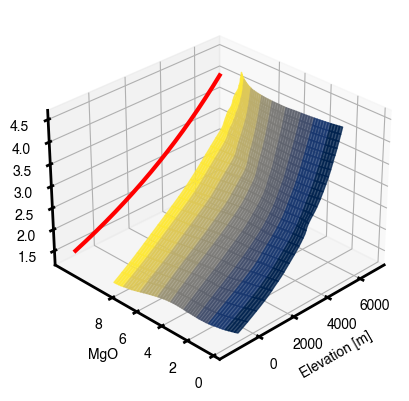

In [109]:
import matplotlib as mpl
cmap = mpl.cm.cividis
bounds = np.arange(1,9,1)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N, extend='both')
m = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)
m.set_array([])

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

ax.plot_surface(luffi_gd_yb[:,:,2]*1000,
                luffi_gd_yb[:,:,0],
                luffi_gd_yb[:,:,1],
                facecolors=m.to_rgba(luffi_gd_yb[:,:,0]),
                cmap=cmap, norm=norm, alpha=0.8)

ax.plot(gd_yb_baseline.squeeze(), np.ones(gd_yb_baseline.shape).squeeze()*12, gd_yb_baseline_values.squeeze(), 
        color='r', linewidth=3)

ax.set_xlabel('Elevation [m]')
ax.set_ylabel('MgO')
ax.set_yticks(np.arange(0,9,2))

ax.view_init(30, 225)
plt.show()


In [63]:
gd_yb_baseline.shape #, gd_yb_baseline_values, np.zeros(gd_yb_baseline.shape), color='r', alpha=0.3)


(500, 1)

In [102]:
gc = Rocks.Geochem()


In [118]:
df = gc.dropna(subset=['Longitude', 'Latitude'])
grid = pygmt.datasets.load_earth_relief(region='d', resolution='02m', registration='gridline')
res = pygmt.grdtrack(grid=grid, points = df[['Longitude','Latitude']], newcolname='elevation')
df = df.reset_index()
df['elevation'] = res['elevation']

df = joy.compute_ratios(df, long_list=True)
df = joy.fix_fe(df)

subduction_zone_polygons = gpd.read_file('/Users/simon/GIT/bx/Bingxi/gis/FarnerLee_subduction_zones/FarnerLee_subduction_zones.shp')
df_clip = df.overlay(subduction_zone_polygons, how='intersection', keep_geom_type=False)


/opt/anaconda3/envs/pygmt7/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/envs/pygmt7/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/envs/pygmt7/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/envs/pygmt7/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/envs/pygmt7/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/envs/pygmt7/lib/python3.8/site-packages/pandas/

In [119]:
df_filt_Chapman = joy.filter_the_database(df_clip, 'Chapman', age_max=1.)
df_filt_FarnerLee = joy.filter_the_database(df_clip, 'FarnerLee', age_max=1.)


Number of samples after basic filtering 128464
Number of samples with 55<=sio2<=70 = 47066
Number of these samples with 1<=mgo<=4 = 34094
Number of these samples with 0.05<=rb/sr<=0.25 = 14388
Final number of samples passed = 14388
Number of samples after basic filtering 128464
Number of these samples with a valid sio2 = 97609
Number of these samples with major element sum > 98%= 62598
Final number of samples passed = 62598


0 la_yb
1 sr_y
2 gd_yb


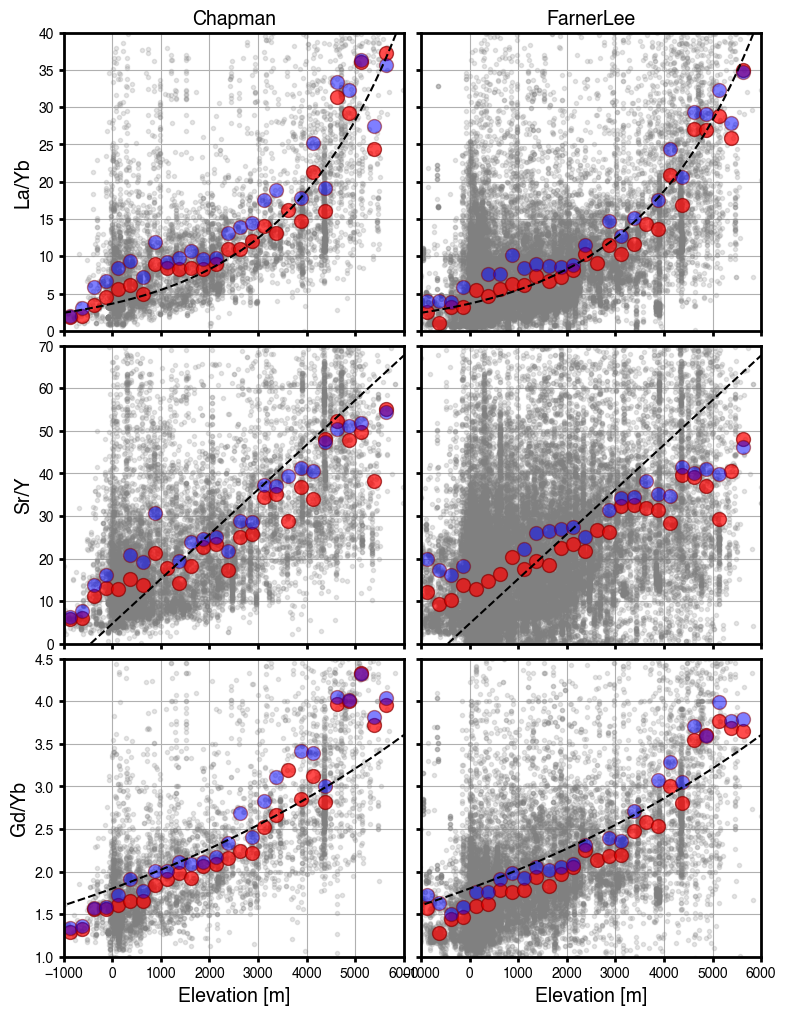

In [122]:
bins = np.arange(-1000,6000,250)
df_group_Chapman = df_filt_Chapman.groupby(by=pd.cut(df_filt_Chapman.elevation, bins=bins))
bin_centers_Chapman = [key.mid for key in list(df_group_Chapman.groups.keys())]
df_group_FarnerLee = df_filt_FarnerLee.groupby(by=pd.cut(df_filt_FarnerLee.elevation, bins=bins))
bin_centers_FarnerLee = [key.mid for key in list(df_group_FarnerLee.groups.keys())]


meanmarkersize = 10
meanmarkeredgecolor = 'darkred'
labelfontsize = 14

gc_dict = {}

gc_dict['la_yb'] = {}
gc_dict['la_yb']['plot_range'] = (0,40)
gc_dict['la_yb']['label'] = 'La/Yb'
gc_dict['la_yb']['baseline'] = la_yb_hu_baseline
gc_dict['la_yb']['baseline_values'] = la_yb_baseline_values

gc_dict['ln_la_yb'] = {}
gc_dict['ln_la_yb']['plot_range'] = (0.6,4)
gc_dict['ln_la_yb']['label'] = 'log(La/Yb)'

gc_dict['sr_y'] = {}
gc_dict['sr_y']['plot_range'] = (0,70)
gc_dict['sr_y']['label'] = 'Sr/Y'
gc_dict['sr_y']['baseline'] = sr_y_baseline
gc_dict['sr_y']['baseline_values'] = sr_y_baseline_values

gc_dict['gd_yb'] = {}
gc_dict['gd_yb']['plot_range'] = (1,4.5)
gc_dict['gd_yb']['label'] = 'Gd/Yb'
gc_dict['gd_yb']['baseline'] = gd_yb_baseline
gc_dict['gd_yb']['baseline_values'] = gd_yb_baseline_values



fig = plt.figure(figsize=(9,12))
gs = fig.add_gridspec(nrows=3, ncols=2, wspace=0.05, hspace=0.05)

for i,gc_name in enumerate(['la_yb', 'sr_y', 'gd_yb']):
    print(i, gc_name)
    
    ax = fig.add_subplot(gs[i, 0])
    ax.plot(df_filt_Chapman.elevation, df_filt_Chapman[gc_name], '.', alpha=0.2, color='gray')
    ax.plot(bin_centers_Chapman, df_group_Chapman[gc_name].median(), 'ro', alpha=0.7, markersize=meanmarkersize, markeredgecolor=meanmarkeredgecolor)
    ax.plot(bin_centers_Chapman, df_group_Chapman[gc_name].mean(), 'bo', alpha=0.5, markersize=meanmarkersize, markeredgecolor=meanmarkeredgecolor)
    ax.plot(gc_dict[gc_name]['baseline'], gc_dict[gc_name]['baseline_values'], 'k--')
    ax.set_xlim(-1000,6000)
    ax.set_ylim(gc_dict[gc_name]['plot_range'])
    ax.set_ylabel(gc_dict[gc_name]['label'], fontsize=labelfontsize)
    ax.grid()
    #ax.legend(loc='upper left', fontsize=legend_fontsize)
    if i<2:
        ax.set_xticklabels([])
    else:
        ax.set_xlabel('Elevation [m]', fontsize=labelfontsize)
    if i==0:
        ax.set_title('Chapman', fontsize=labelfontsize)

    ax = fig.add_subplot(gs[i, 1])
    ax.plot(df_filt_FarnerLee.elevation, df_filt_FarnerLee[gc_name], '.', alpha=0.2, color='gray')
    ax.plot(bin_centers_FarnerLee, df_group_FarnerLee[gc_name].median(), 'ro', alpha=0.7, markersize=meanmarkersize, markeredgecolor=meanmarkeredgecolor)
    ax.plot(bin_centers_FarnerLee, df_group_FarnerLee[gc_name].mean(), 'bo', alpha=0.5, markersize=meanmarkersize, markeredgecolor=meanmarkeredgecolor)
    ax.plot(gc_dict[gc_name]['baseline'], gc_dict[gc_name]['baseline_values'], 'k--')
    ax.set_xlim(-1000,6000)
    ax.set_ylim(gc_dict[gc_name]['plot_range'])
    #ax.set_ylabel(gc_name)
    ax.grid()
    ax.set_yticklabels([])
    if i<2:
        ax.set_xticklabels([])
    else:
        ax.set_xlabel('Elevation [m]', fontsize=labelfontsize)
    if i==0:
        ax.set_title('FarnerLee', fontsize=labelfontsize)
    
plt.show()


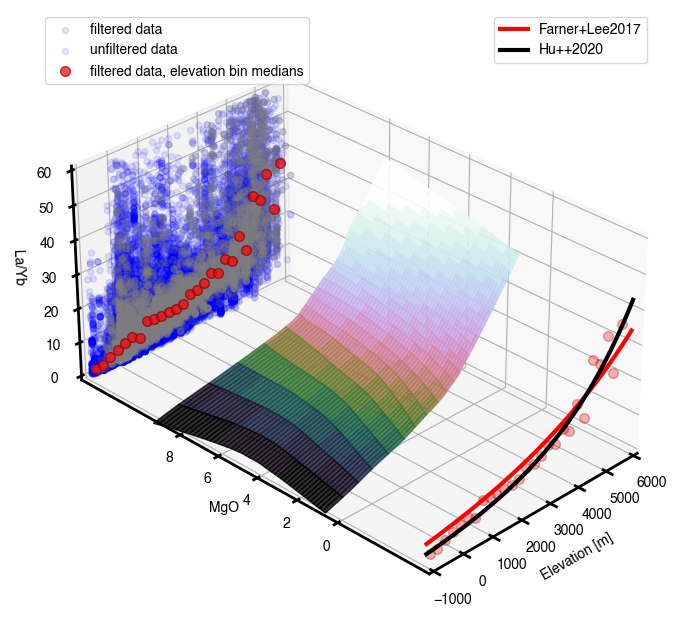

In [252]:
cmap = mpl.cm.cubehelix
#bounds = np.arange(1,9,1)
bounds = np.arange(-1000,6000,250)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N, extend='both')
m = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)
m.set_array([])

fig, ax = plt.subplots(figsize=(12,8),
                       subplot_kw={"projection": "3d"})
ax.computed_zorder = False

#ax.plot_trisurf(luffi_la_yb[:,:,2]*1000,
#                luffi_la_yb[:,:,0],
#                luffi_la_yb[:,:,1],
#                #facecolors=m.to_rgba(luffi_la_yb[:,:,2]*1000.),
#                cmap=cmap, norm=norm, alpha=0.8)

ymax = 13
ymin = -4
meanmarkersize = 7
meanmarkeredgecolor = 'darkred'

tmp = df_filt_Chapman.copy()
tmp[(tmp.elevation>6000)|(tmp.elevation<-1000)|(tmp.la_yb>60)|(tmp.la_yb<0)] = np.nan
s1 = ax.scatter(tmp.elevation, 
                 np.ones(len(tmp.elevation))*ymax, 
                 tmp['la_yb'], '.', alpha=0.2, color='gray', zorder=1, 
                 label='filtered data')
tmp = df_clip.copy()
tmp[(tmp.elevation>6000)|(tmp.elevation<-1000)|(tmp.la_yb>60)|(tmp.la_yb<0)] = np.nan
s2 = ax.scatter(tmp.elevation, 
                 np.ones(len(tmp.elevation))*ymax, 
                 tmp['la_yb'], '.', alpha=0.1, color='blue', zorder=0, 
                 label='unfiltered data')
s3, = ax.plot(bin_centers_Chapman, 
              np.ones(len(bin_centers_Chapman))*ymax, 
              df_group_Chapman['la_yb'].median(), 
              'ro', alpha=0.7, markersize=meanmarkersize, markeredgecolor=meanmarkeredgecolor, 
              label='filtered data, elevation bin medians')

ax.plot_surface(luffi_la_yb[:,:,2]*1000,
                luffi_la_yb[:,:,0],
                luffi_la_yb[:,:,1],
                facecolors=m.to_rgba(luffi_la_yb[:,:,2]*1000.),
                cmap=cmap, norm=norm, alpha=0.8)
    
b1, = ax.plot(la_yb_baseline.squeeze(), 
              np.ones(la_yb_baseline.shape).squeeze()*ymin, 
              la_yb_baseline_values.squeeze(), 
              color='r', linewidth=3, zorder=2,label='Farner+Lee2017')
b2, = ax.plot(la_yb_hu_baseline.squeeze(), 
              np.ones(la_yb_baseline.shape).squeeze()*ymin, 
              la_yb_baseline_values.squeeze(), 
              color='k', linewidth=3, zorder=2,label='Hu++2020')
ax.plot(bin_centers_Chapman, 
        np.ones(len(bin_centers_Chapman))*ymin, 
        df_group_Chapman['la_yb'].median(),
        'ro', alpha=0.3, zorder=1, markersize=meanmarkersize, markeredgecolor=meanmarkeredgecolor)

# Create a legend for the first line.
first_legend = plt.legend(handles=[s1,s2,s3], loc='upper left')
# Add the legend manually to the current Axes.
ax1 = plt.gca().add_artist(first_legend)
# Create another legend for the second line.
plt.legend(handles=[b1,b2], loc='upper right')


ax.set_box_aspect((1.2,2,1))
ax.set_xlabel('Elevation [m]')
ax.set_ylabel('MgO')
ax.set_zlabel('La/Yb')
ax.set_yticks(np.arange(0,9,2))
ax.set_xlim(-1000,6000)
ax.set_ylim(ymin,ymax)
ax.set_zlim(0,60)
ax.view_init(30, 225)
plt.show()


(-1000.0, 6000.0)

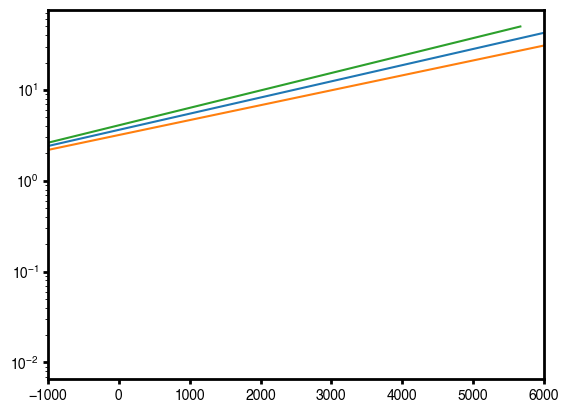

In [235]:
def get_elevation_envelope(values):
    #print(values)
    values = values.mask(values<=0.)
    values = values.mask(np.isinf(values))
    values = (values/0.237)*0.17 # normalize to chondrite
    best_fit = np.log(values / 2.61) / 0.41e-3  # From Hu++2020
    elev_min = np.log(values / (2.61-0.32)) / 0.378e-3  # From Hu++2020
    elev_max = np.log(values / (2.61+0.32)) / 0.442e-3  # From Hu++2020
    return((best_fit,elev_min,elev_max))

test = get_elevation_envelope(la_yb_baseline_values)

plt.semilogy(test[0],la_yb_baseline_values)
plt.semilogy(test[1],la_yb_baseline_values)
plt.semilogy(test[2],la_yb_baseline_values)
plt.xlim(-1000,6000)


In [229]:
0.41+0.032

0.44199999999999995